# Imports

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [5]:
def anglewrap(angList):
    # maps an 0 to 360 angle to -180 to +180
    for i in range(len(angList)):
        if (angList[i] > 180):
            angList[i] = angList[i] - 360
    return 

In [6]:

def import_data(name: str, wrap = True, cleanup = True):
    file = name + ".csv"
    pdoa_data = []
    tdoa_data = []
    rx_true_r = []

    dist_meas = []
    twr_count = []
    dist_true_r = []

    with open(file, "r") as f:
        reader = csv.reader(f)
        for i, line in enumerate(reader):
            linetype = int(line[0])
            if (linetype == 0):
                # rx data, featuring pdoa, tdoa and distance
                pdoa_data += [float(line[1])]
                tdoa_data += [int(line[2])]
                rx_true_r += [float(line[3])]
            
            if (linetype == 1):
                dist_meas += [int(line[5])]
                twr_count += [int(line[6])]
                dist_true_r += [float(line[7])]

            if (linetype == 2):
                print("CIR data")
    
    if (wrap):
        # Wrap angles
        anglewrap(rx_true_r)
        anglewrap(dist_true_r)

    if (cleanup):
        # Remove extreme dist outliers:
        dist_keep_indx = [i > 1000 for i in dist_meas]
        dist_meas_filt = []
        dist_r_filt = []
        twr_count_filt = []

        out_num = 0

        for i in range(len(dist_keep_indx)):
            if dist_keep_indx[i] == True:
                dist_meas_filt += [dist_meas[i]]
                dist_r_filt += [dist_true_r[i]]
                twr_count_filt += [twr_count[i]]
            else:
                out_num += 1

        print("Num of outliers: " + str(out_num))
        # Update values
        dist_meas = dist_meas_filt
        dist_true_r = dist_r_filt
        twr_count = twr_count_filt
    
    return (pdoa_data, tdoa_data, rx_true_r, dist_meas, twr_count, dist_true_r)

# Prepare data

In [7]:
rx_true_r = []
pdoa_data = []
dist_true_r = []
dist_meas = []

# List of measurements:
files = ["nnew_dist05m", "nnew_dist10m", "nnew_dist15m", "nnew_dist20m", "nnew_dist25m", "nnew_dist30m", "nnew_dist35m", "nnew_dist40m", "nnew_dist45m", "nnew_dist50m"]
log_num = len(files)
for log in files:
    temp_pdoa, _, temp_rx_r, temp_dist, _, temp_dist_r = import_data(log, True, False)
    rx_true_r += [temp_rx_r]
    pdoa_data += [temp_pdoa]
    dist_true_r += [temp_dist_r]
    dist_meas += [temp_dist]

# Plot data

# Measurements over time

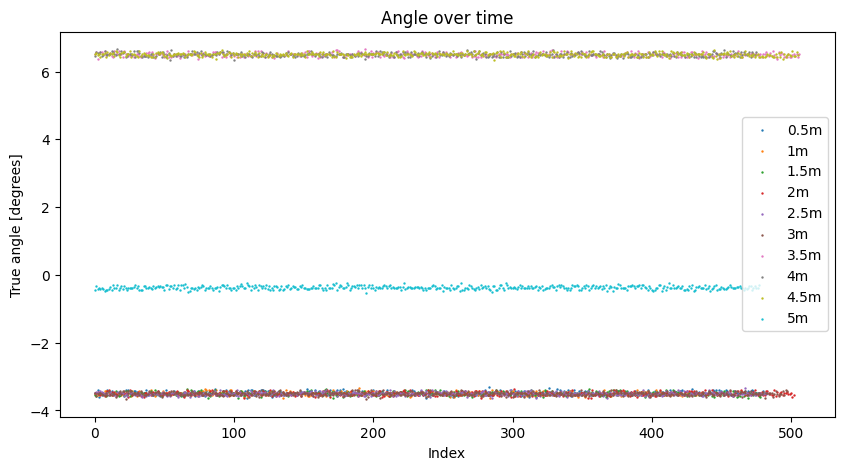

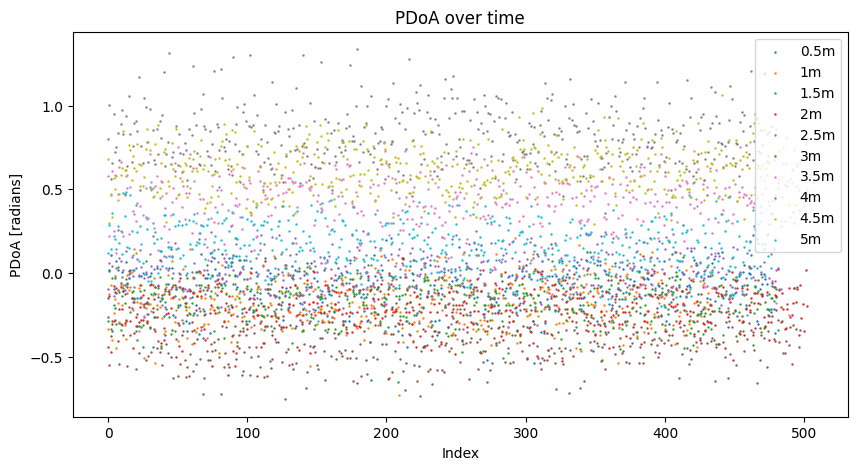

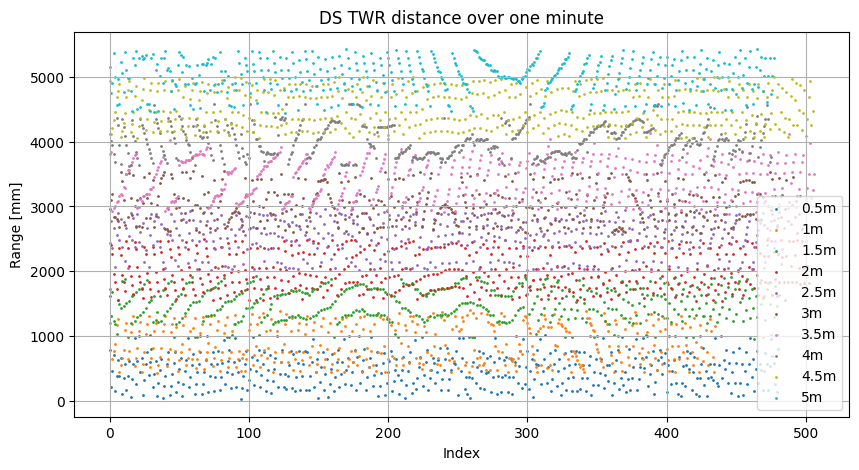

In [22]:
plt.figure(figsize=(10,5))
plt.title("Angle over time")
for i in range(log_num):
    plt.scatter(range(len(rx_true_r[i])), rx_true_r[i], s=0.5)
plt.xlabel("Index")
plt.ylabel("True angle [degrees]")
plt.legend(['0.5m', '1m', '1.5m', '2m', '2.5m', '3m', '3.5m', '4m', '4.5m', '5m'])

plt.figure(figsize=(10,5))
plt.title("PDoA over time")
for i in range(log_num):
    plt.scatter(range(len(pdoa_data[i])), pdoa_data[i], s=0.5)
plt.xlabel("Index")
plt.ylabel("PDoA [radians]")
plt.legend(['0.5m', '1m', '1.5m', '2m', '2.5m', '3m', '3.5m', '4m', '4.5m', '5m'])

plt.figure(figsize=(10,5))
plt.title("DS TWR distance over one minute")
for i in range(log_num):
    plt.scatter(range(len(dist_meas[i])), dist_meas[i], s=1)
plt.xlabel("Index")
plt.ylabel("Range [mm]")
plt.legend(['0.5m', '1m', '1.5m', '2m', '2.5m', '3m', '3.5m', '4m', '4.5m', '5m'])
plt.grid()

In [23]:
names = ['0.5m', '1m', '1.5m', '2m', '2.5m', '3m', '3.5m', '4m', '4.5m', '5m']

# Check the variation and mean
for i in range(log_num):
    temp_data = np.array(dist_meas[i])
    mean_dist = np.mean(temp_data/1000)
    var_dist = np.var(temp_data/1000)

    print("Statistics for distance: " + names[i])
    print("Mean: " + str(mean_dist) + ", variance: " + str(3*np.sqrt(var_dist)))



Statistics for distance: 0.5m
Mean: 0.4774158004158004, variance: 0.7557331332753996
Statistics for distance: 1m
Mean: 0.8871077981651376, variance: 0.8927455324911868
Statistics for distance: 1.5m
Mean: 1.5052551867219914, variance: 0.7390217046154571
Statistics for distance: 2m
Mean: 2.00965407554672, variance: 0.8605564433617032
Statistics for distance: 2.5m
Mean: 2.5191177685950414, variance: 0.8285245181894969
Statistics for distance: 3m
Mean: 3.016516064257028, variance: 0.8229908324690253
Statistics for distance: 3.5m
Mean: 3.418175542406312, variance: 0.9112078989395382
Statistics for distance: 4m
Mean: 4.01997268907563, variance: 0.7144260960017945
Statistics for distance: 4.5m
Mean: 4.522416996047431, variance: 0.8688119564445916
Statistics for distance: 5m
Mean: 5.006359832635983, variance: 0.784748637872297
